In [ ]:
## Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

import PIL
from PIL import Image
import re
import gensim
import string
from tqdm import tqdm


from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.layers import Conv1D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import (BatchNormalization,Dense,
                          TimeDistributed, Dropout, Bidirectional,Flatten, GlobalMaxPool1D)

from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

from keras.utils import to_categorical
import os
from glob import glob 
import pathlib
import tensorflow as tf
pd.set_option('display.max_colwidth', 255)


https://www.microsoft.com/en-us/download/details.aspx?id=54765


## Introduction
Machine Learning algorithms that perform image classification are extremely useful and widely used. From imaging studies like the cancer data set we worked with earlier this semester to identifying fruit types, or identifying objects in satellite photos. It is very far reaching and quite useful.


The problem my project aimed to address was one of binary classification. Is it a dog, or is it not a dog. That is the question. And the algorithm I used to solve this problem was a deep learning algorithm called a convolutional neural network (CNN for short). They are designed to detect and partition data into categories and are especially adept at image classification. 

Why is it important?
The answer to: Is it a dog or not a dog feels rudimentary. But the actual application of such a simple algorithm saves millions of dollars in manpower a year. There are many problems that fall into just two little categories, is it there or is it not. 
Take for example a company making syringes of some clear solution.The solution must not contain particles of any kind. The number doesn't matter,it is a simple yes or no. Now image a person having to inspect every single one that passes through manufacturing. Not every 10th, not one out of every batch. But hundreds if not thousands a day. That type of work is exausting for a person and turnover would be high for that position. 
So the savings when a system is put in to detect if there are particles present would be many fold. From hiring and training costs, to the expensive process of investigation if there is a miss, and the cost to the employees themselves that have to perform the task until burnout, then have to ultimately find another position.
And since the question is "Is it there or is it not" binary classification will do. 

Summary of the proccess
The algorithm was fed thousands of images and given time to learn from them, and then metrics were collected (accuracy, loss).





# Model Comparisons
When it came to the data set I was working with, there were a few choices for models. First and foremost was the Convolutional Neural Network model (Deep learning).Another notable mention was KMeans, so I decided to attempt to implement that as well.

Below is the implementation of Kmeans algorithm on the same data as that used for the CNN. To help provide supporting justification for the use of a Convolutional Neural network model.Kmeans was described as a great algorithm for binary classification, specifically image classification. But my model fit result suggested otherwise,at least at my current skill set and skill level. The fit model prediction hovered around 50%. It was then decided to attempt to use the CNN.

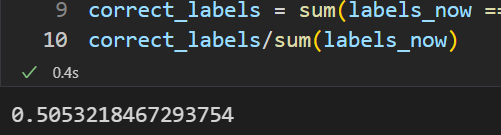

# Background on CNN models

Convolutional Neural Networks (CNN) specialize in processing data by using a grid like structure of layers and nodes. And just like the human brain they process simpler details first, followed by more complex. This same reasoning is why filter layers tend to increase as we go down the model so to speak.

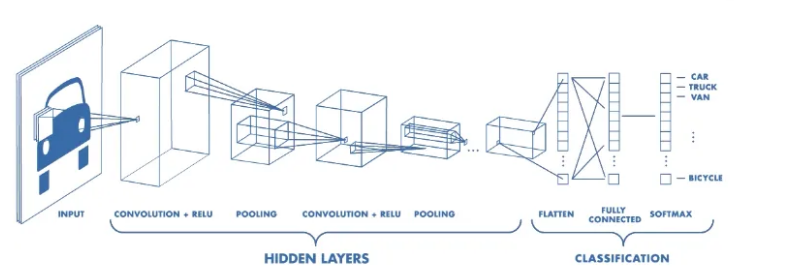

<sup><sub>https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939#:~:text=A%20Convolutional%20Neural%20Network%2C%20also,binary%20representation%20of%20visual%20data.</sup></sub>

They are built with a combination of specialized layers which are illustrated above. `Convolution` is where the model performs computation, usually a dot product between two matrices. The `kernel` is what holds the math formula for application and when each pixel in the output image is a function of the nearby pixels (including itself) in the input image, the kernel is that function. It is s a 2D matrix that helps the model do math.  

The `pooling layer` shrinks the size of the input by a specified factor. The most popular being `Max pooling`, which takes the maximum value of the specified area.
"If we have an activation map of size W x W x D, a pooling kernel of spatial size F, and stride S, then the size of output volume can be determined by the following formula:

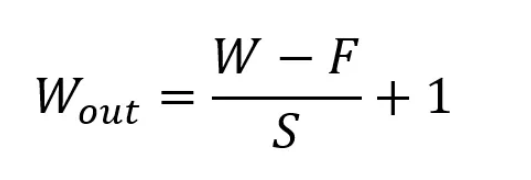


This will yield an output volume of size Wout x Wout x D.

Next is the `fully connected layer`, which means that neurons in that layer are connected to all neurons in the preceding layer.A weights matrix is applied to transform the input vector.

`Activation` layers apply nonlinear functions to otherwise linear activation map. `Sigmoid` is one of the functions available and normalizes the value to a range between [0,1]. `Relu` is another useful function which sets the threshold for activation to 0.

`Flattening` are also often used, which shape the output into a 1D array. 

# Data Set introduction visualization and analysis

The data set  came from Microsofts website. It is a set of about 23,000 jpg. images of cats and dogs for training machine learning algoritms. (11,500 cats and 11,500 dogs)  
There were no missing images, there were no duplicate file names. The data set itself was fairly clean. The images had typical 3 channel encoding (rgb)

The images did need to be resized, there were many different sizes. 
About 400 to be exact. 
The below plot is of the unique sizes from both categories together.


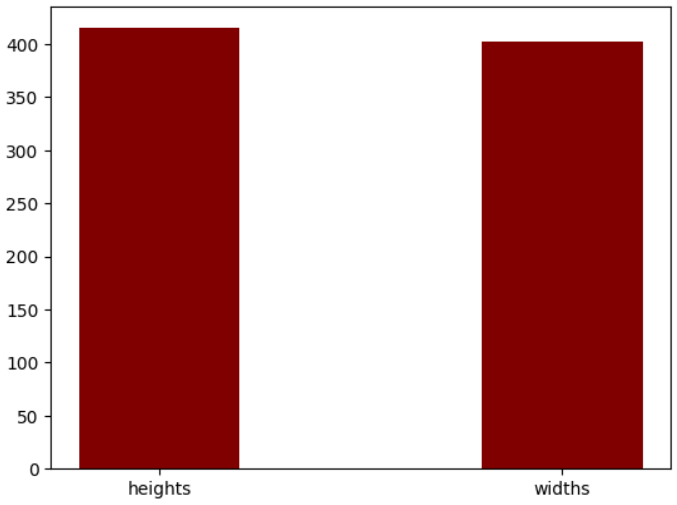

And this is for the categories separately. Both contain many varied sizes of images.


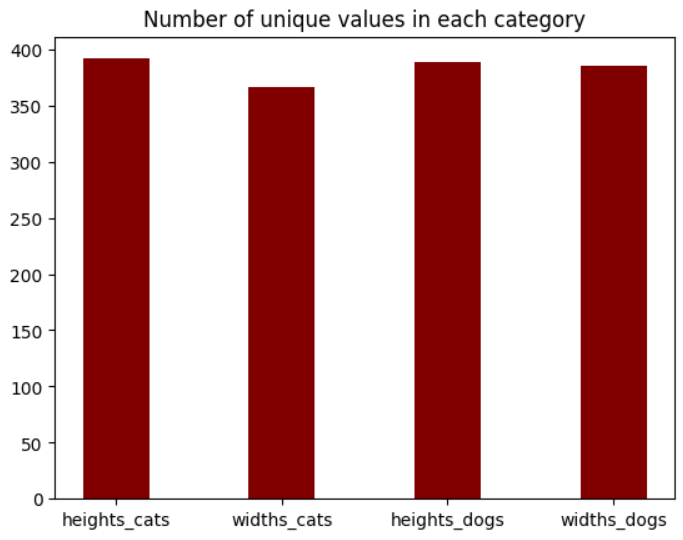

The plots below show that the majority of images were about 350 pixels high by 500 pixels wide. Across both categories cats and dogs.


  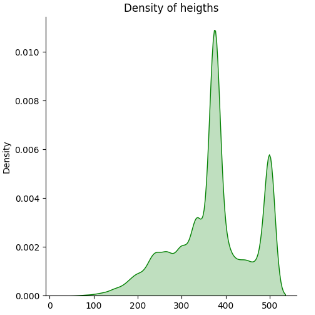  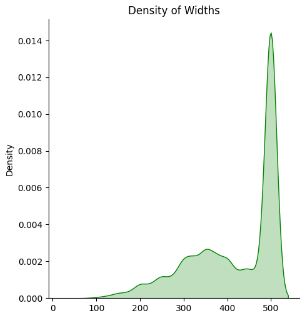

The RGB pixel density for the two categories of photos was also analyzed.
The higher the pixel density the more detailed the photo. 
And on average the cat photos had a greater pixel density. 
The reason for this is not entierly clear, and will be adjusted for in the model when the photos are all rescaled.

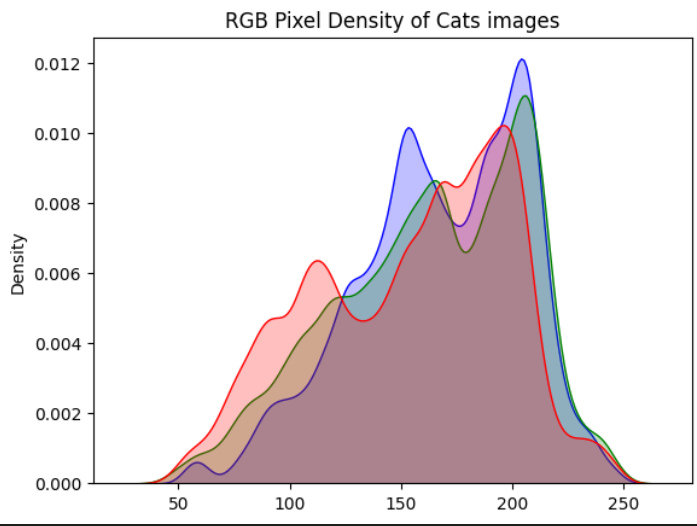

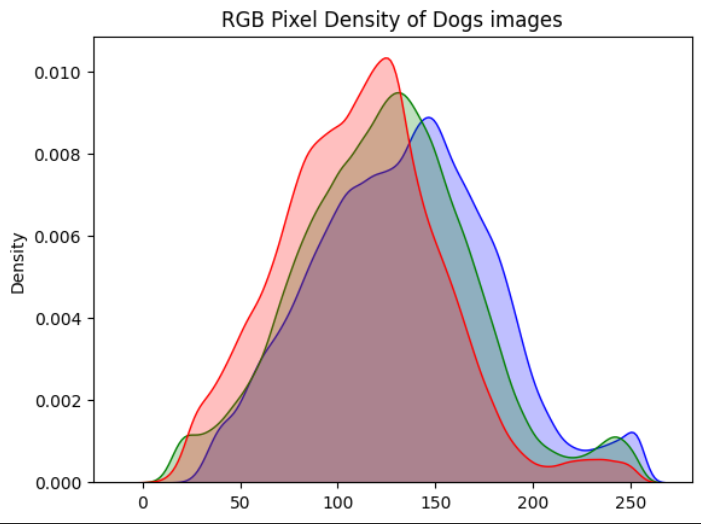

The data was also loaded in and inspected because it is important to verify that the images are indeed adorable.

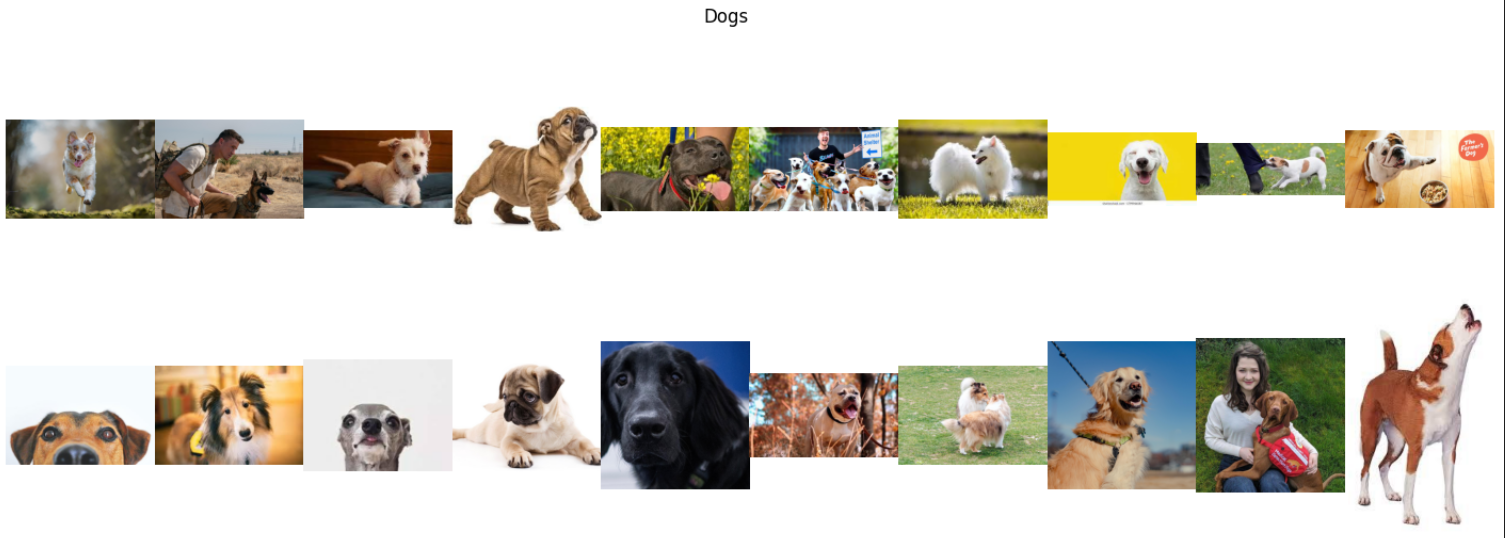

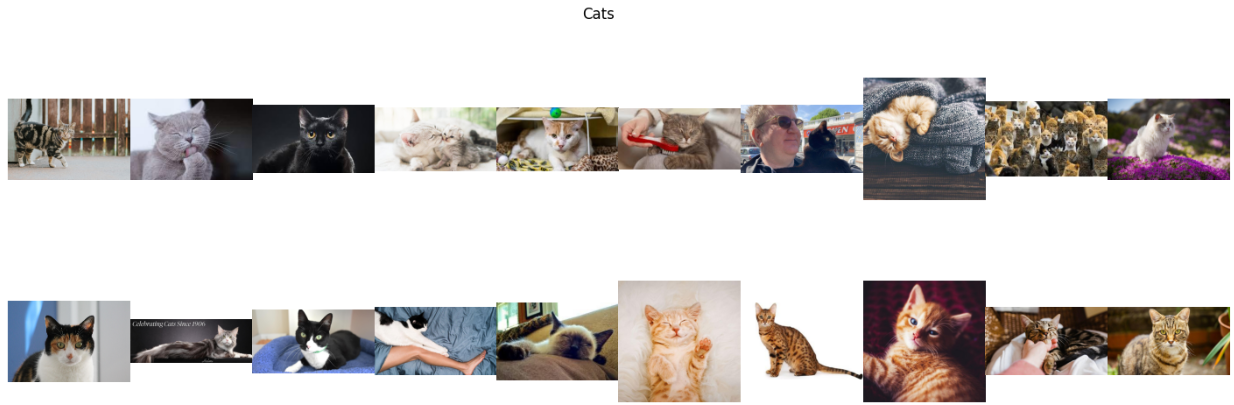





<br>

<br>


# Model Building Process

With the huge amount of image data in this data set, figuring out how to partition it properly was a bit cumbersome at first.

Instead of the traditional train test split, I attempted to create folders for the train, validation and test sets which could be deleted at any time and then repopulated with new data. 

This allowed me to easily partition the test set of data without any risk of data leakage. 

I used the split folders function for the data partitioning. 
Copies of the original datasets sat in two specific folders to be pulled from, and the copies being moved prevented any crossover into other folders. 

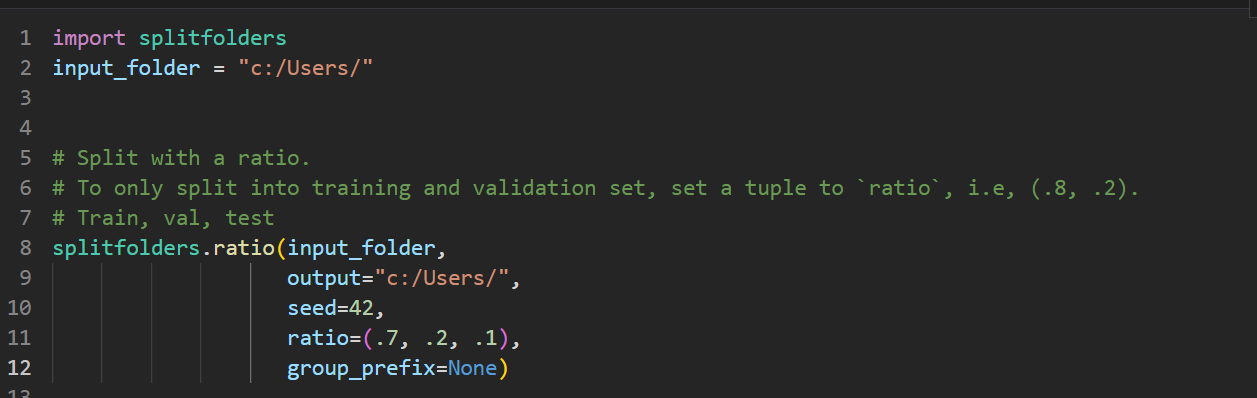




After the data was loaded in it needed some preprocessing to deal with the differing image sizes.
The imageDataGenerator utility was perfect for the task, the images were rescaled, and flipped in one go.

the rescaling variable helps to normalize the images setting them to a value between [0,1] which is useful if the data being analyzed varies heavily. Which the image data does, being differently sized. 
The images are also occasionally flipped horizontally and vertically.

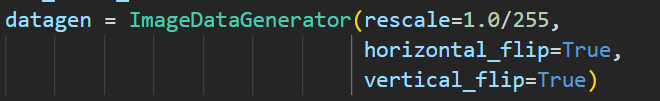


The flow from directory utility is used to feed the model the images so to speak.

Since the pictures are in color the color mode is plain old rgb. 

And since the problem is binary classification, the class mode is set to binary.
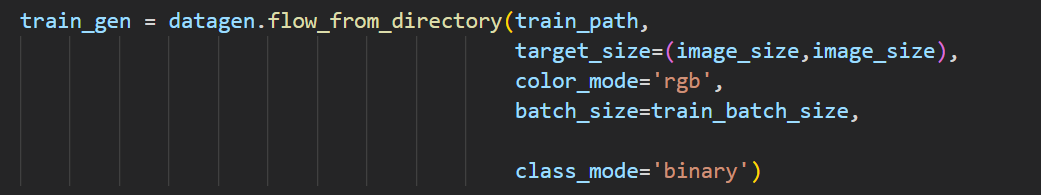

My chosen image size is 200, and the batch size I chose was 10. It made the model a bit slower but all models performed well right out of the gate using these parameters so I chose not to change them. Below is the message that prints after the files are loaded into the generators.

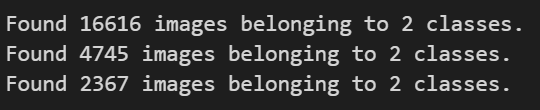



## My first Model


Initial Model summary - In addition to the arcitecture in the below figure:
* Kernel size = (3,3)
	* Kernel Size determines the number of pixels the filter covers. For example the 3,3 kernel size used for this project covers a 3X3 region of the image.
	* While it makes the run time longer for the model the accuracy is improved for smaller filters over larger ones.
* Pool size =(2,2)
	* Will reduce the size of the input by a factor of 2. Max pooling is also used which returns the maximum output for the specified area.
* Filters =(32,64,128)
	* There will also be 3 filters applied. Which get larger as the layers get deeper. 
	* The purpose of filters is to help the model capture details. 
	* The first few layers capture simpler details. As the model moves down the layers, or rather they deepen it is able to capture more complex patterns.
* Dropout Factors(0.3,0.5)
	* The probability that a neuron is shut off during the droput phase in the model. Helps prevent overfitting.
* Activation functions- (Relu and sigmoid) 
	* Relu - helps speed up training by setting the threshold of the activation function to 0.
	* Sigmoid - Normalizes the numbers obtained to a value between [0,1].
* Optimization method (Adam)
	* Stochastic gradient descent, with a learning rate of 0.001, and binary crossentropy loss function.
* Misc.Params 
	* Early stop function to help prevent overfitting if there is no change in accuracy.
	* Learning Rate adjustment - if the model plateus while learning the learning rate can adjust and slow down.


This model has a total of 3372033 total parameters. When all was said and done. 

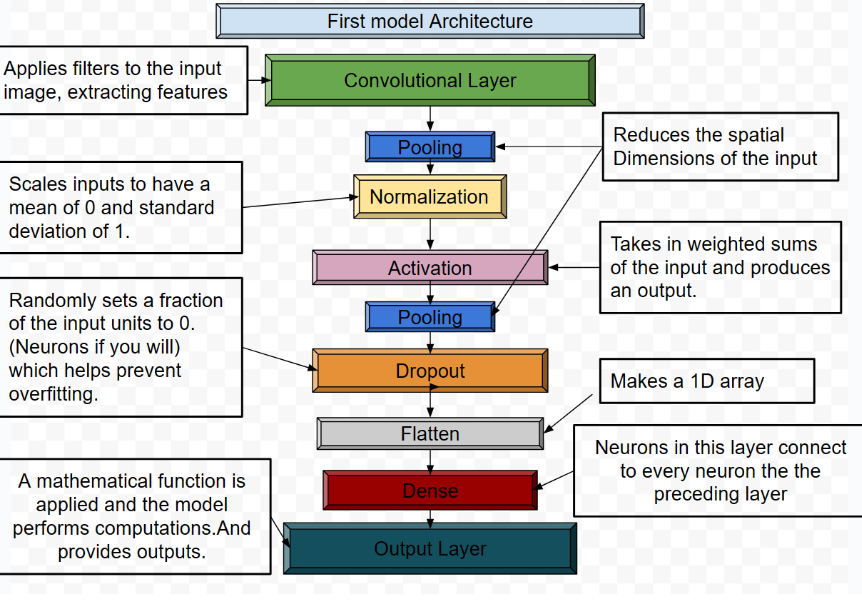

I used keras and tensorflow.

# Model Tuning procedure

My initial model prediction results: 89% So I made the following changes and observed:

For my second model I changed the dropout rate to 0.2

Then I changed the layering adding a 4th filter.

Changed Dropout Density back to 0.3

Added Fifth filter

Lowered the initial learning rate to 0.0005

Raised learning rate to 0.01


# Results and Discussion

## Model tuning results

## Initial Model

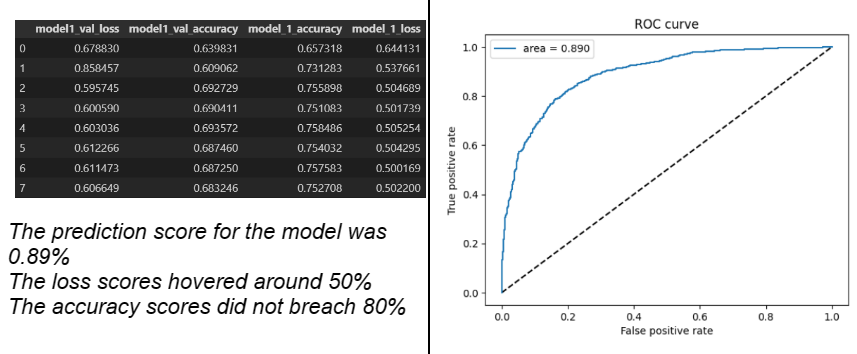	

The initial model performance was fair.The prediction accuracy was 0.89%.
<br>
 The loss decreased steadily until it levelled out around the second epoch.
<br>
The validation loss at the second epoch spiked and then decreased sharply otherwise the model loss remained around 0.6
<br>
Accuracy increased sharply from the inital to 1st epoch then leveled out showing signs of instiability.(The increase and decrease of the plot)
<br>
Validation accuracy experienced a sharp decrease then a corrective increase between the 1st and second epoch.
<br>
It can be noted that the validation loss increase occurs at the same epoch as a sharp decrease then correction in the validation accuracy.


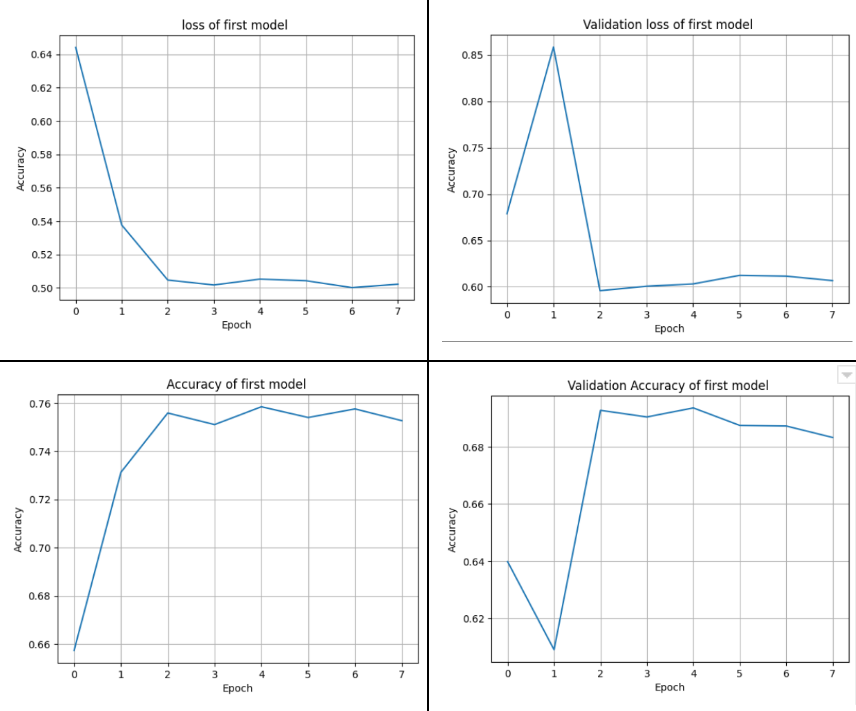


<br>

## Second model

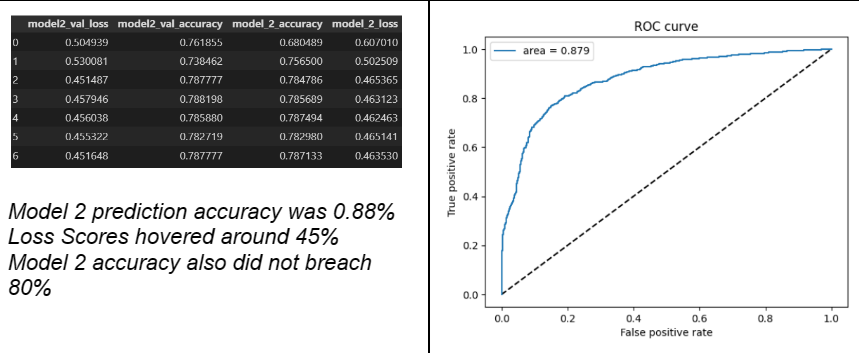

The second model performance was fair.The prediction accuracy was 0.88%.
<br>
 The loss decreased steadily until it levelled out around the second epoch.
<br>
The validation loss at the second epoch spiked and then decreased sharply otherwise the model loss remained around 0.45
<br>
Accuracy increased sharply from the inital to 2nd epoch then leveled out.
<br>
Validation accuracy experienced a sharp decrease then a corrective increase between the 1st and second epoch.
<br>
It can be noted that the validation loss increase occurs at the same epoch as a sharp decrease then correction in the validation accuracy.

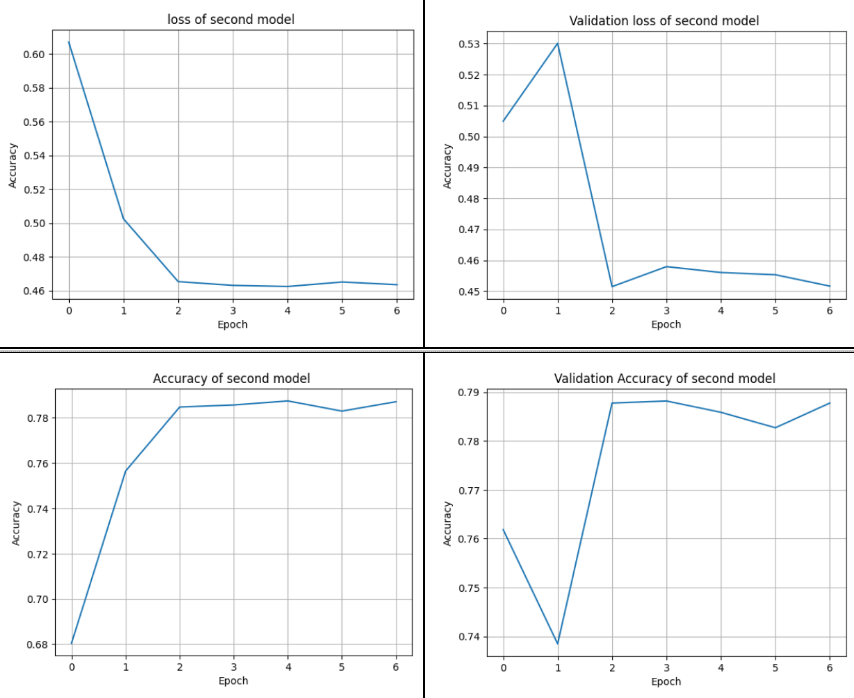







## Third Model

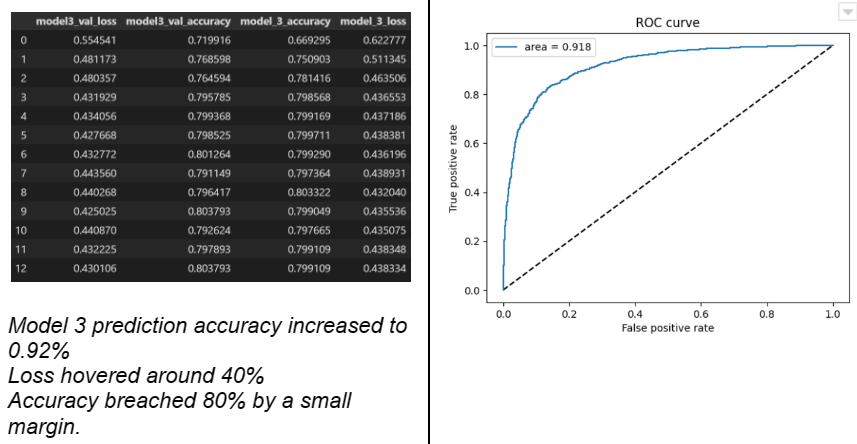
<br>
 The loss decreased steadily until it levelled out around the second epoch.Showing some signs of instability.
<br>
The validation loss showed instability as well. Showing increases and decreases from epoch to epoch. Overall hovers around 0.4
<br>
Accuracy increased sharply from the inital to 3rd epoch then leveled out around 80%.
<br>
Validation accuracy was extremely unstable, showing changes of about 0.05 between training sessions. It also did not become stable by the end of the run. Early stopping took effect. 
The addition of the extra layer and the Relu activation function that came with it may have led to some instability which is evident in the plots below.
<br>
<br>
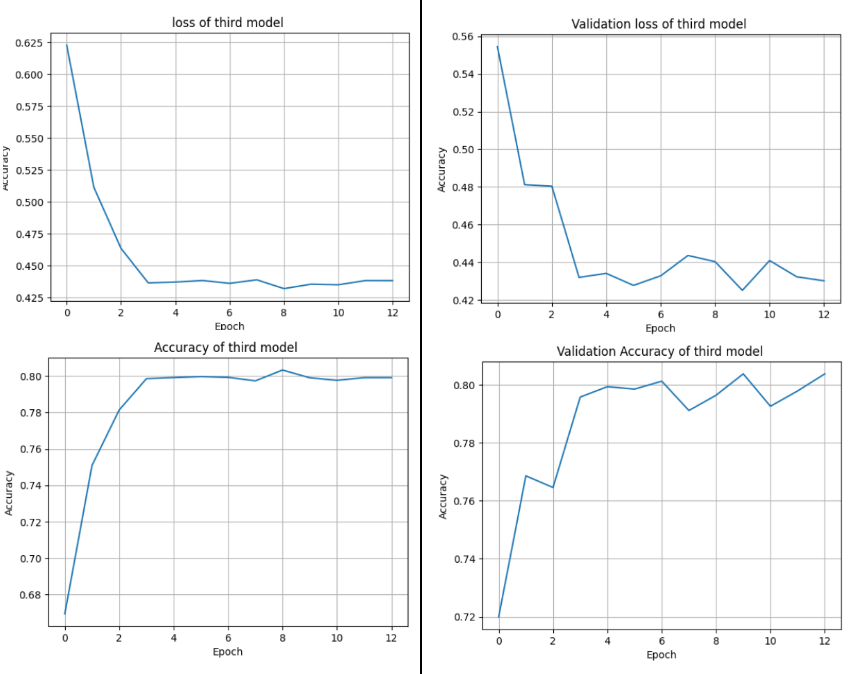



## Fourth Model

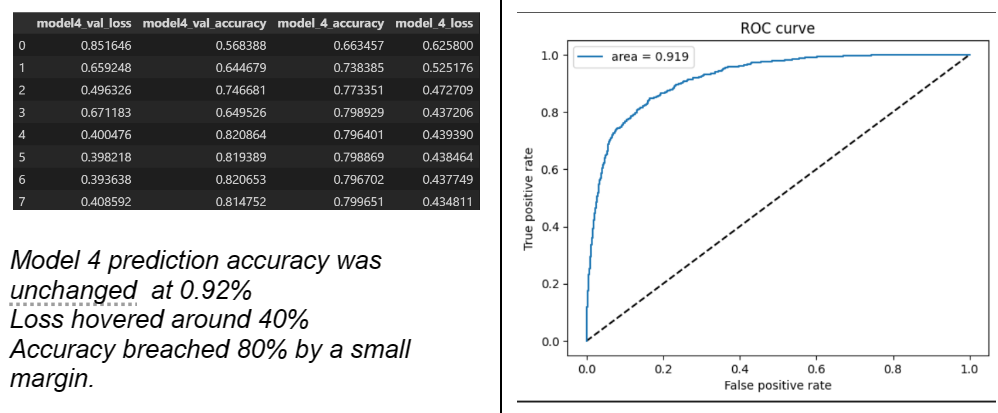

<br>

The loss of the fourth model decreased sharply in the first few epochs, then the changes became almost imperceptable. 
<br>
The validation loss showed extreme changes in the first few epochs. Changing by almost 0.2 between the 2nd and 3rd epoch. At the 4th it flatlined at around 0.4.
<br> 
The accuracy showed a similiar smooth increase to about 80%, then a levelling off. 
<br>
Validation accuracy showed extreme changes, decreasing by 10% in early epochs, then increasing and stabilizing around 80%.
<br>
It could be that neurons that the model heavily depended on hapenned to be switched off because of the increased dropout rate. 
Which would cause an initial decrease and then recovery. 

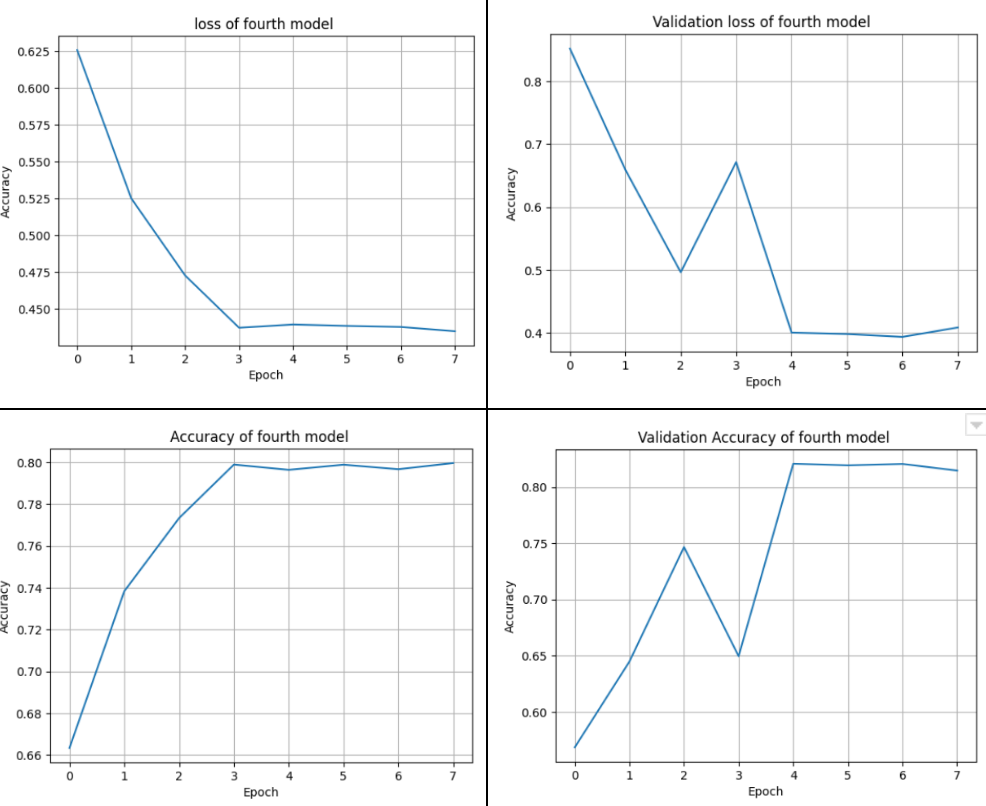

# Fifth Model
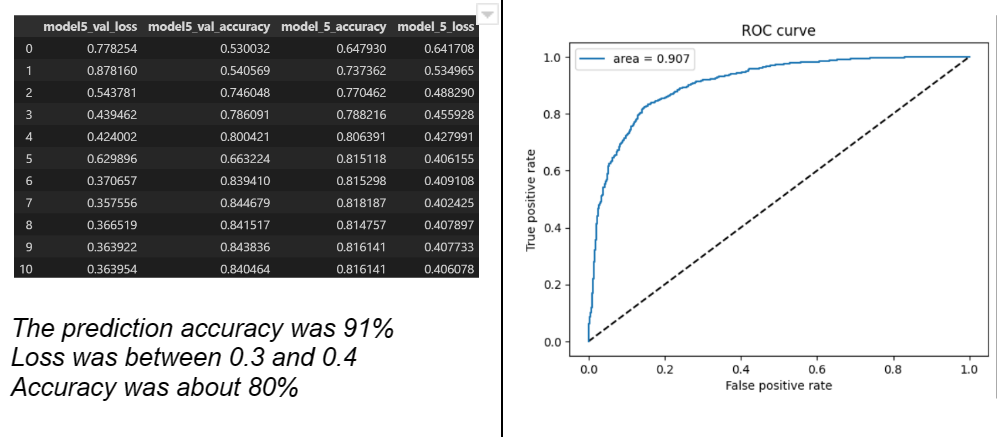
<br>
Loss was very stable overall, leveling off at about 0.425 and remaining there.
<br>
Validation loss showed instability around the 4th to 6th epoch of training, with a marked increase,followed by a sharp decrease and leveling off effect.
<br>
Accuracy was quite stable remaining at around 82% for the entierty of training.
<br>
Validation accuracy showed instability congruent with validation loss, a sharp decrease followed by a sharp increase and levelling off at about 85%

Adding the fifth layer caused extreme fluctations in the model performance, but when the model reached a stable learning plateu it became very resistant to change. 
But it may have begun to overfit, since the prediction accuracy result is lower than for the previous model. (90% to 92% for model 4)

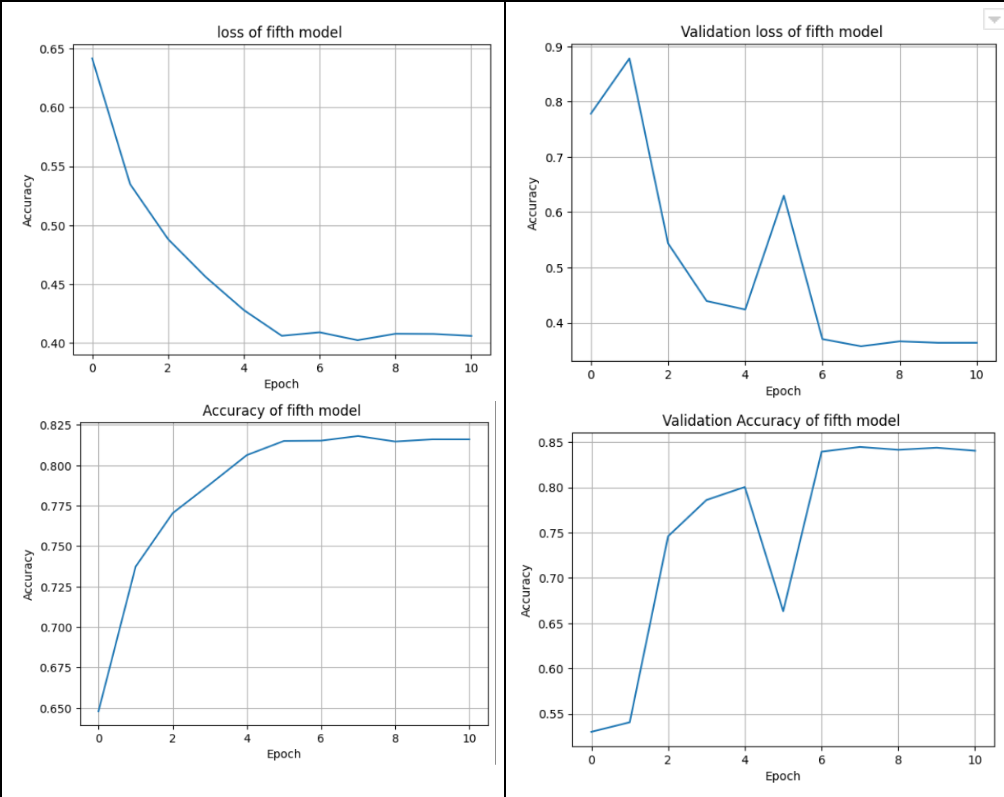

## Sixth model

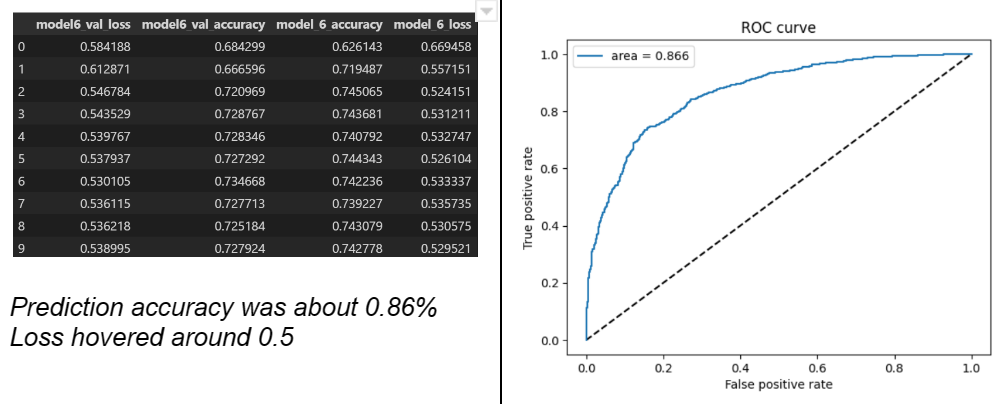
<br>
The loss remained above 0.5 throught training.
<br>
Validation loss showed sharp increases and only decreased to 0.5 as well. 
<br>
The accuracy did not go above 74%
<br>
Validation accuracy showed extreme instability
The learning rate being decreased may have caused the model to get 'hung up' is the only way it can be described. 
It plateud in learning very quickly.

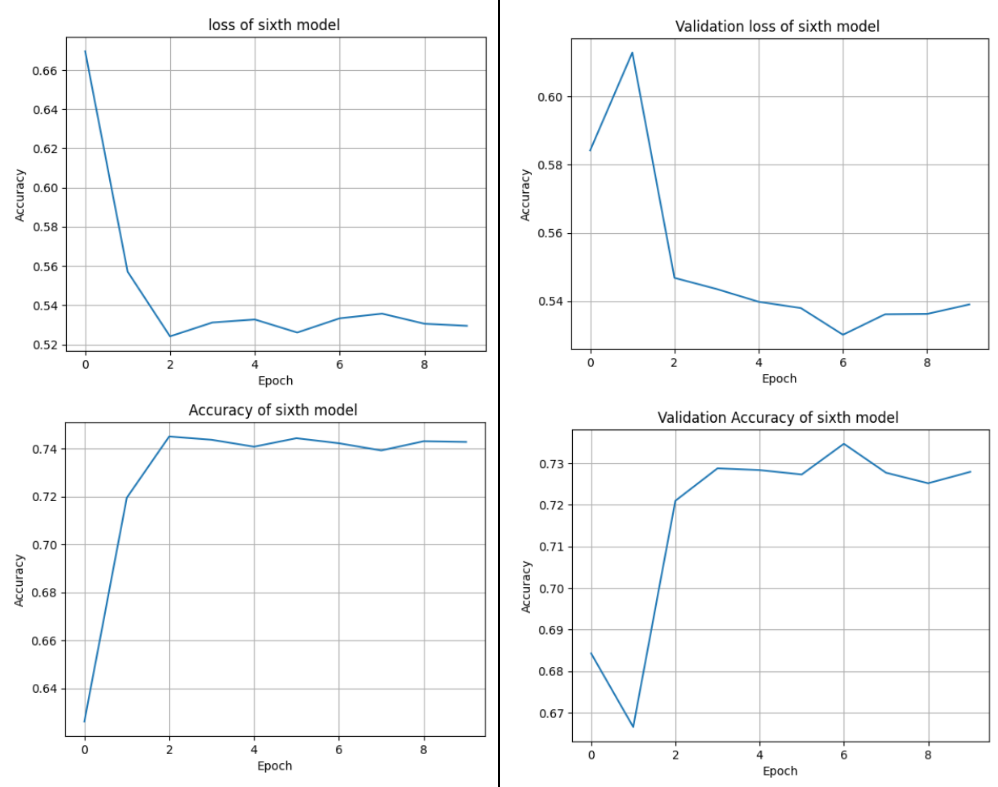

# Seventh Model

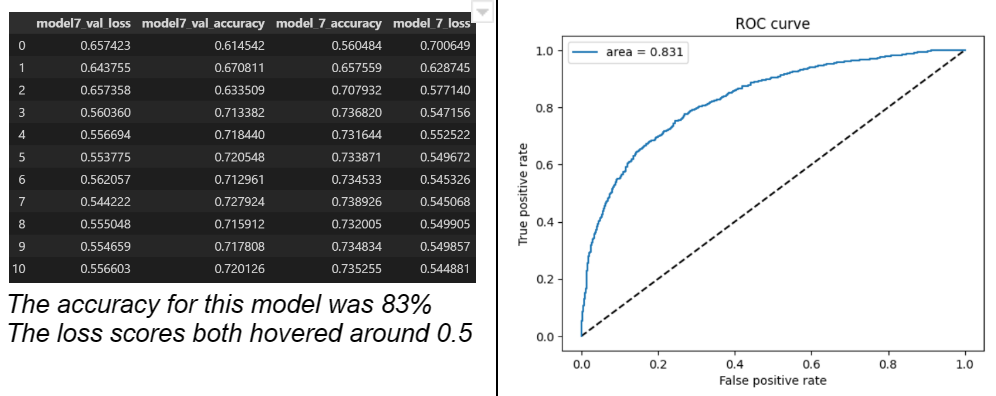
<br>


The model prediction accuracy was 83%
<br>
The loss did not go below 0.54
<br>
The validation loss was similiar, plateuing at the same values as loss.
<br>
The accuracy remained around 72%
<br>
Validation accuracy performed similiarly, with a few notable sharp decreases.
Raising the learning rate did not give the model enough time to train so to speak. And it met the threshold for early stopping quite quickly. 

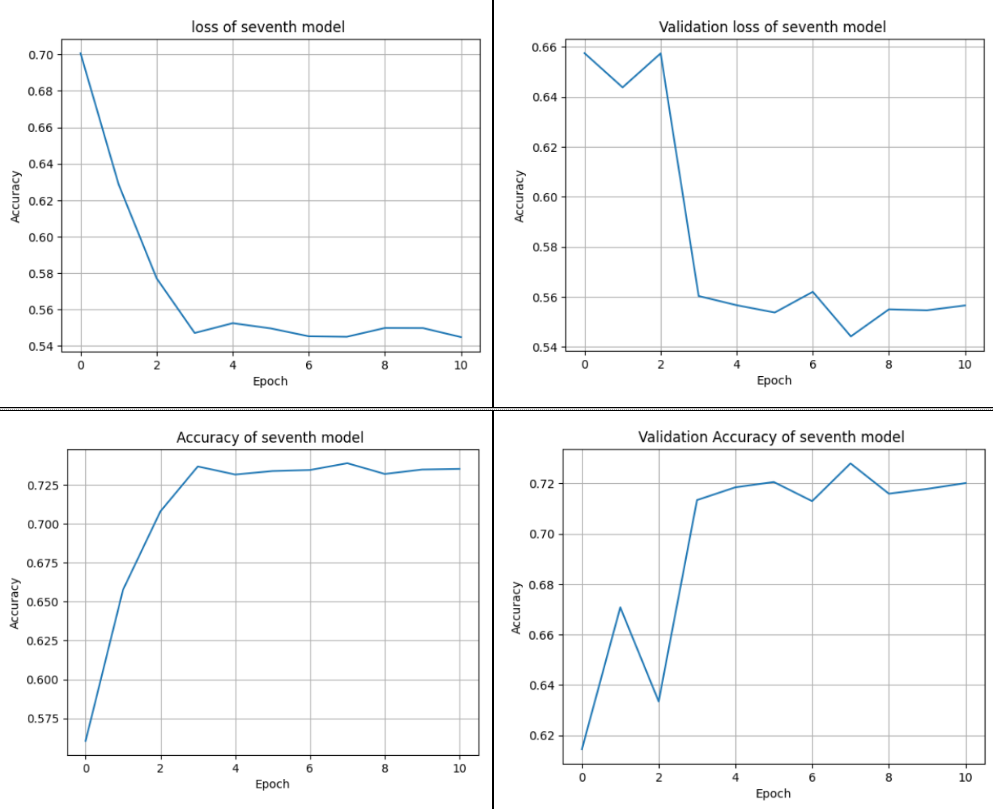

# Best model choice.

Going by just the accuracy of a prediction for model choice is not the best route. Overall performance needs to also be considered.

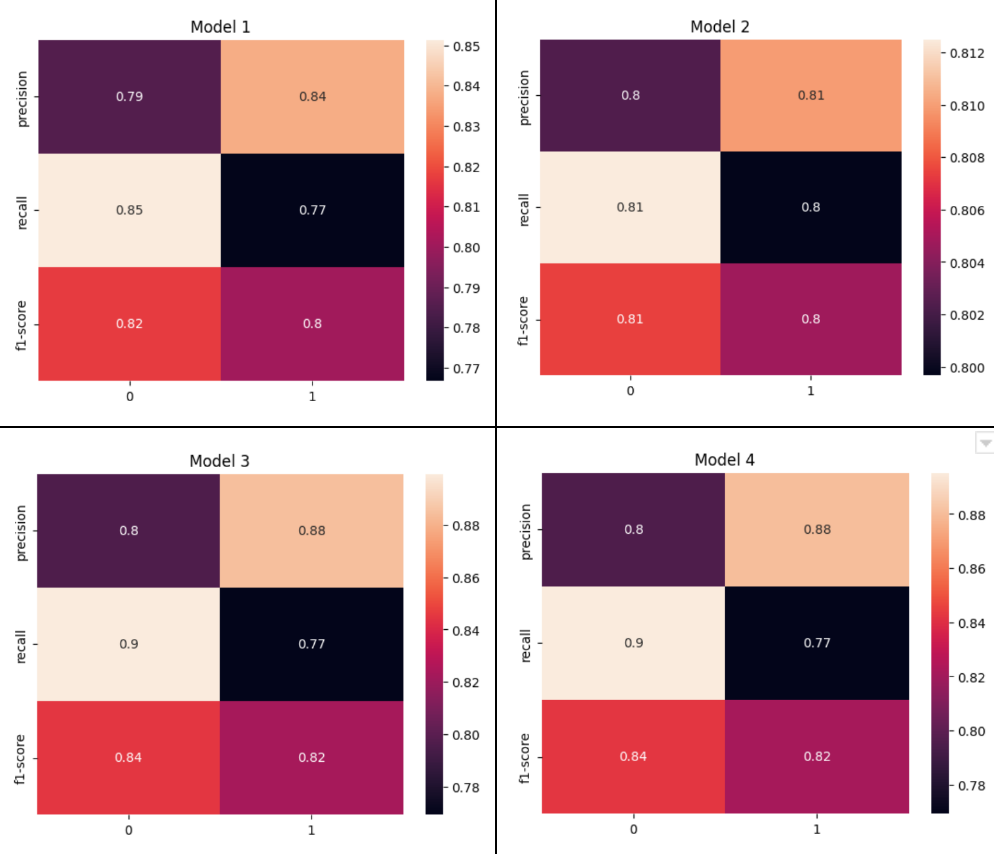
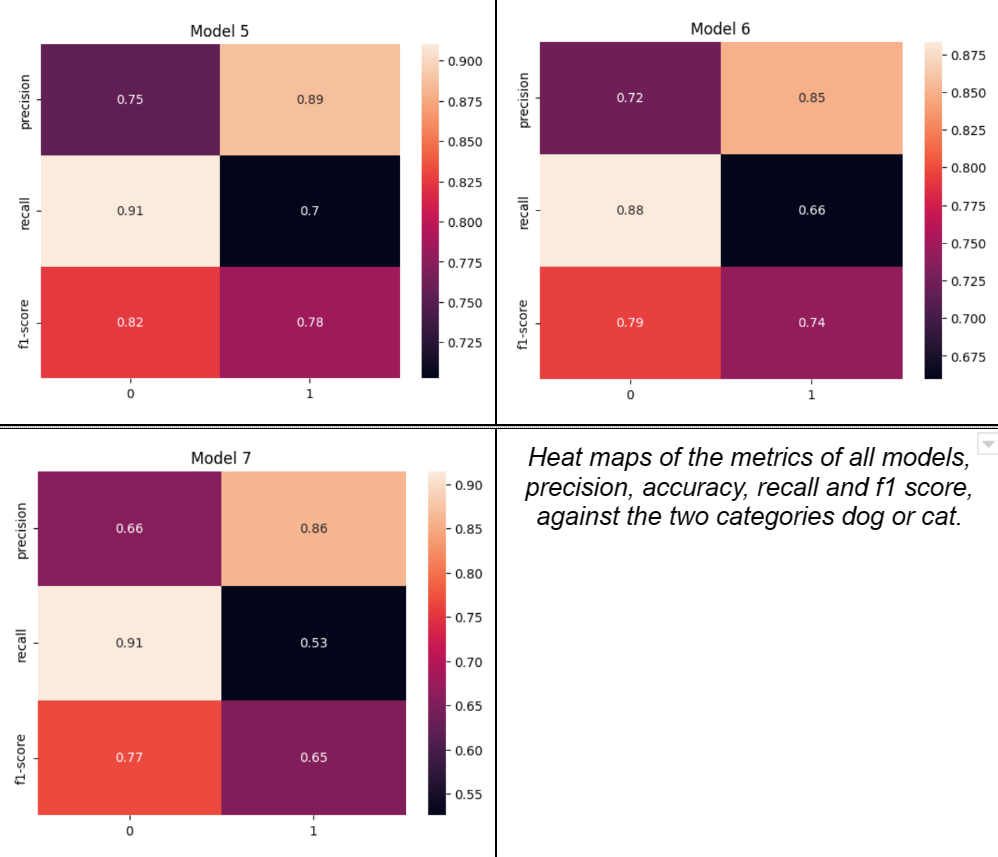

<br>
<br>
All of these confusion matrices are a bit much at first. But they help visualize the overall results from each model. From first impressions it seems model 4 or model 3 were very strong performers, with high scores in all areas.

# Precision

<br>
Going from left to right,in the below plot precision for each model never goes above 0.8 or so.
That means all of the models have some misclassification error. 
<br>
But for every single matrix the precision for items in the "1" category (cats) was much higher than for dogs.
<br>
This is true for every single model.
In fact there is a clear downward trend in the precision of the models based on the changes made.

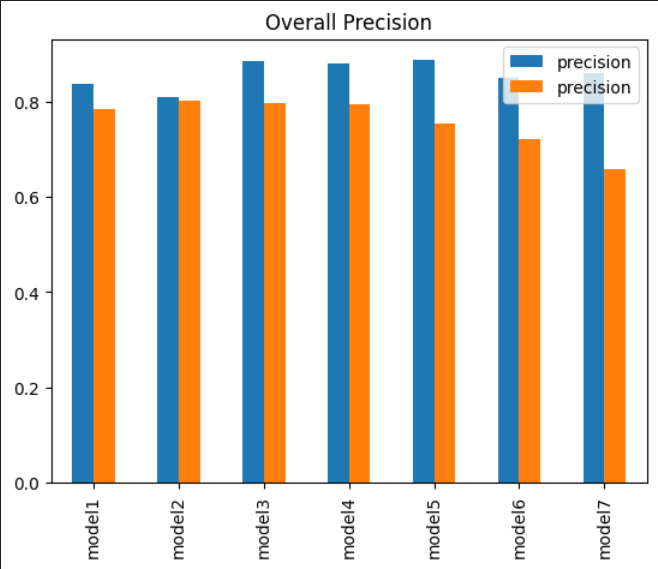

<br>

# Recall

<br>
The recall of the model is measure of the ability of the model to classify the correct item the correct way. 
Converesly the recall for dogs is much better than for cats despite the lower precision with which they are classified on average. 
Model 3 and 4 fared the best in this category with 0.9 and 0.77 respectively. Model 6 was the worst perfromer at 0.66 for the cats category. 
While model 1 did not have the highest performance, it was the most stable with both categories being very close together.
<br>
And the same trend can be seen here as well, the model metric results increase steadily until model 3 or 4, then the recall decreases slowly from model to model. 

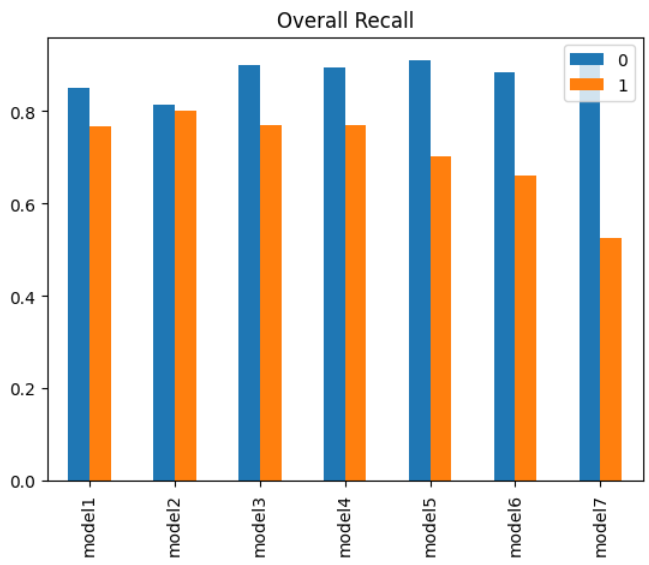
<br>


<br>

# F1 Score
The F1 score is a measure of the overall accuracy of the model. 
The F1 scores follow suit in the trending of the other metrics. 
<br>
There is a slight increase from model to model until model 4. Then the results begin to decrease markedly.
<br>

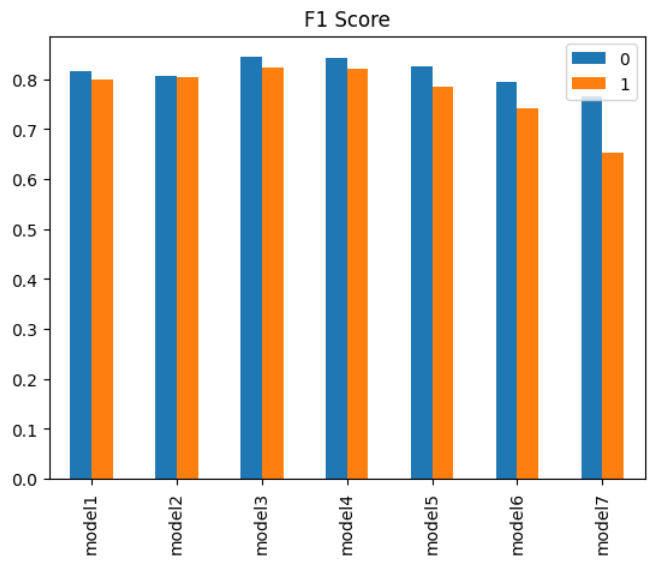



# I did continue tuning the model
I first tried changing the dropout frequency. I increased it by 0.1 and my results were actually better than the previous attempt. I also made the validation patience a little higher for my model so it would not stop before the training was actually complete. 
<br>
While there is always a danger of overfitting, my models always had very short fit times compared to those I have seen in examples and references. 
And the prediciton cast by the model was higher by a few points, 93% from 91%. 


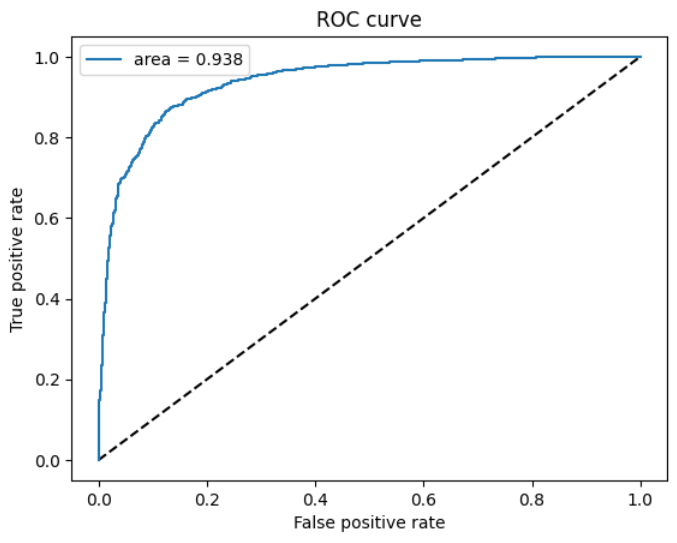

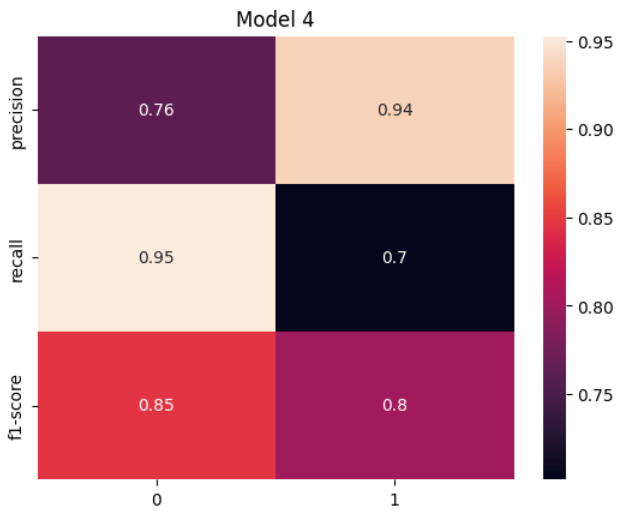

I also tried to change some of the relu activation functions to sigmoid but that made the accuracy take a nose dive.

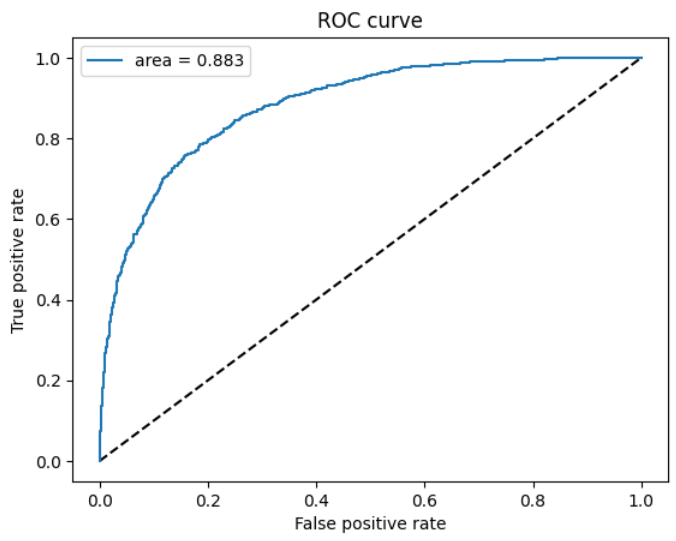

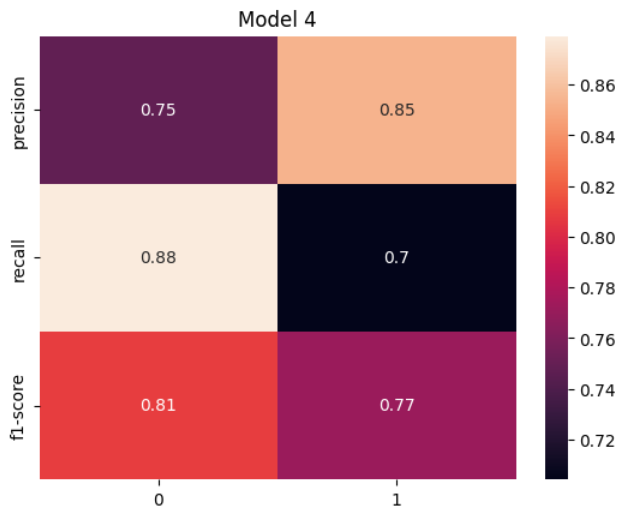

I also tried to change the number of training steps but again, obtained a worse result.

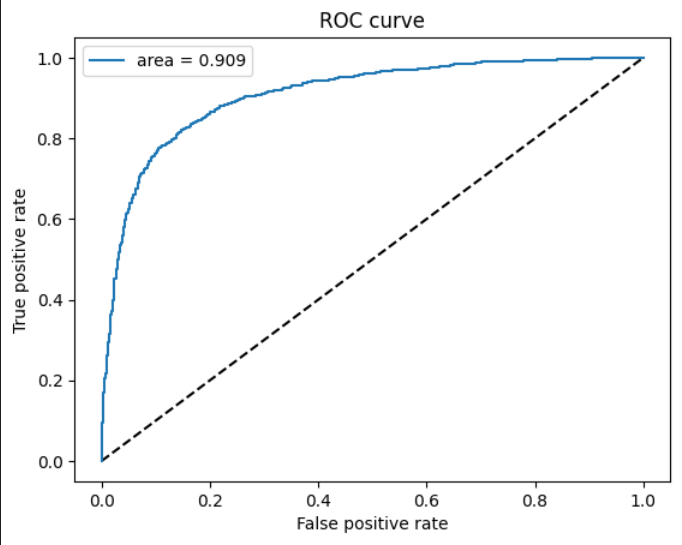

## Discussion


# What worked what did not
One of the things that helped improve the model was adding a 4th filter layer, from just an initial 3. It went from 32,64,128 to 16,32,64,128. What filters do is help the model capture details. So the smaller filter captures stuff like edges and other rough details. And as the layers get deeper the model can capture more detail. With more layers the model has more time or space or both to do this. But too many layers and the effect is no longer apparent. Model 4 to 5 had an increase in layers from 4 to 5 and the effect was a decrease in metrics overall. 
Another very helpful change was the dropout density being set to 0.3. The dropout layer shuts off neurons with a specified probability, this helps prevent overfitting and can yield more stable results in the model. Model 4 had this change made and it yielded be best metrics compared to other models. The steady increase and fast plateu of the accuracy of model 4 helps to lend support to this idea.And when the best model was chosen and tuned, an increase in dropout rate helped push the accuracy score for predictions made by the model from 91% to 94%. 
Changing the learning rate did not have much effect with the implementation of the adjust_learning_rate on plateu function, the model adjusted when accuracy fell below a ceratin metric. For this particular project lowering the learning rate caused the model to decrease in its performance.Models 6 and 7 both had changes made to their learning rates. And the results were significantly lower than previous models. 
Overall I think I performed the task sucessfully and in the future I would perform it similiarly, my results were good. I would explore the effects of layering more or how different functions effect the stability of the model and results. 
My final accuracy ended up being 94% and that is quite allright for only my second time working with CNN models. 

My best results:


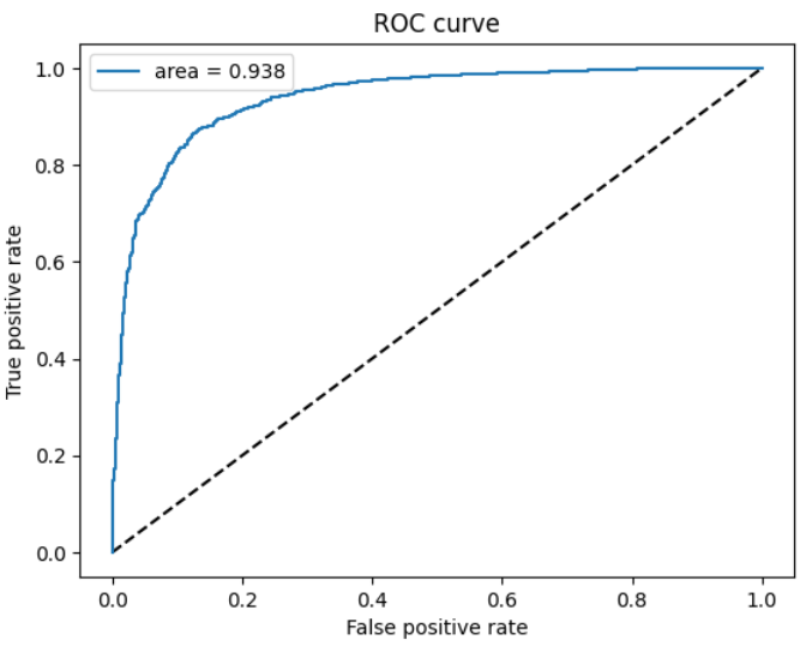

Additionaly I did attempt to use Softmax instead of sigmoid for my activation function. The results were terrible. And this was because my last layer was dense (1) so softmax which is for multiclass classification caused a nosedive. But even with corrections the performance was not increased enough to warrant changing my model. 


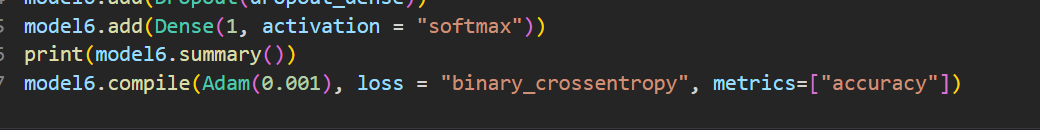

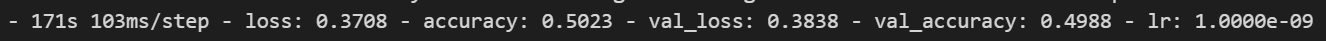